We picked this dataset because we were interested in the chemical properties of wine. 

In [35]:
import numpy as np
import pandas as pd

data = pd.read_csv("winequality-red.csv", delimiter=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This description of the data shows every column has the same count so there are no missing values. The standard deviation tells how disperse the data is. Min and max show the range of values in each column.

<AxesSubplot: >

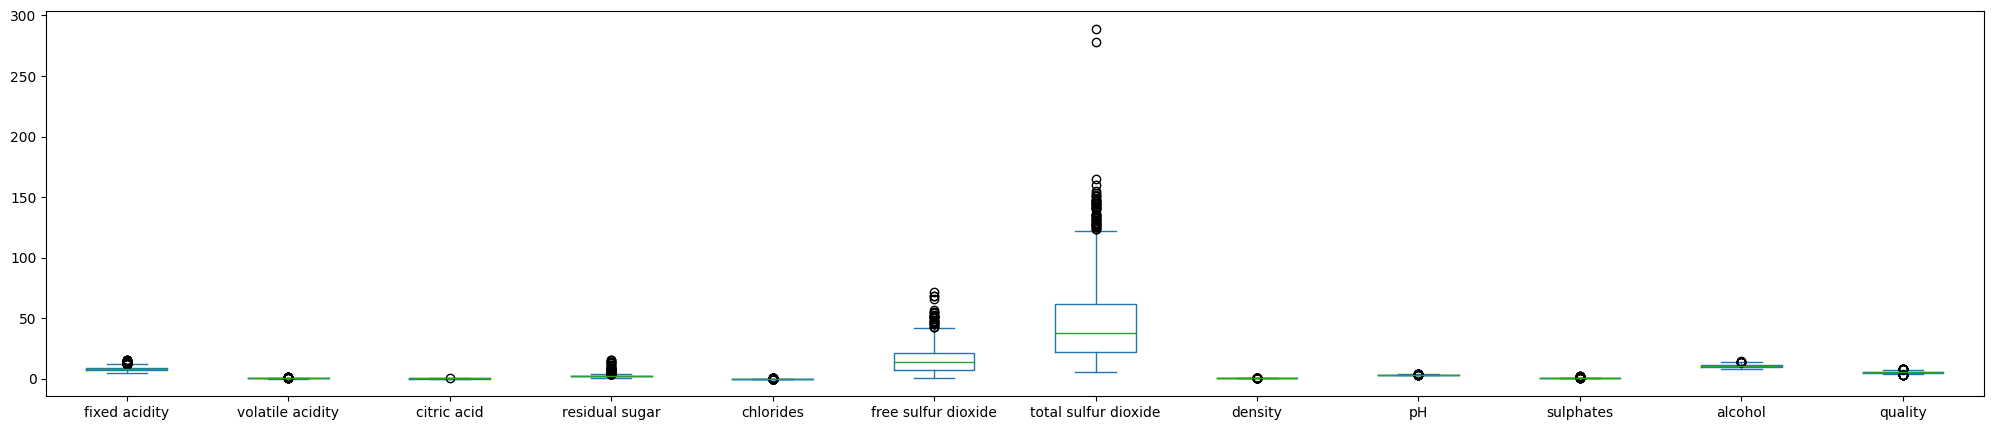

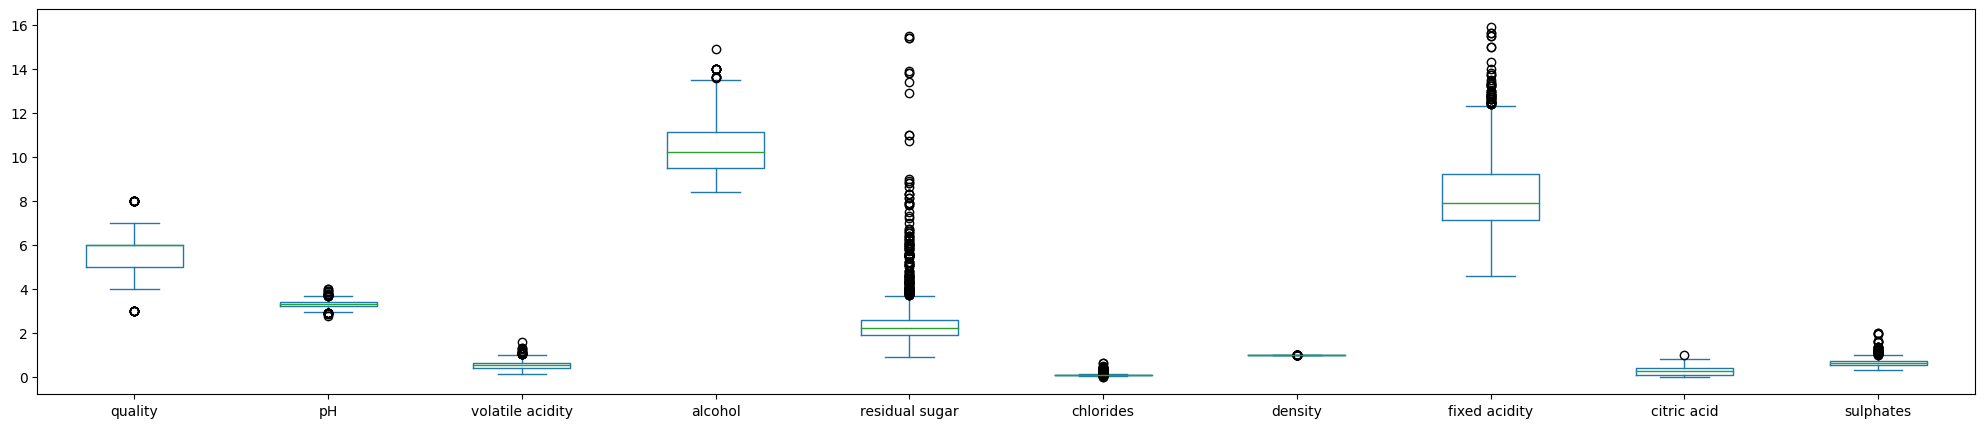

In [37]:
data.plot(kind="box", figsize=(25,5))
cols = set(data.columns)
cols.remove("free sulfur dioxide")
cols.remove("total sulfur dioxide")
cols = list(cols)
notsulfurs = data[cols]
notsulfurs.plot(kind="box", figsize=(25,5))


The above box plots show every column has atleast one outlier. Residual sugar, free sulfur dioxide, total sulfur dioxide, and fixed acidity appear to have the most outliers.

In [38]:
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    data = data[~((data [column] < Lower_Fence) |(data[column] > Upper_Fence))]

data.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1124.000000,1124.000000,1124.00000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,8.143950,0.522678,0.24508,2.179537,0.078376,14.812278,41.104093,0.996577,3.325667,0.627580,10.342823,5.622776
std,1.444876,0.164194,0.17996,0.437907,0.013766,8.583848,24.661787,0.001559,0.130154,0.111864,0.947403,0.723635
min,5.100000,0.120000,0.00000,1.200000,0.042000,1.000000,6.000000,0.992560,2.980000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.08000,1.900000,0.069750,8.000000,22.000000,0.995520,3.237500,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.24000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.39000,2.400000,0.087000,20.000000,54.000000,0.997500,3.402500,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.73000,3.600000,0.116000,40.000000,113.000000,1.000400,3.680000,0.940000,13.000000,7.000000


<AxesSubplot: >

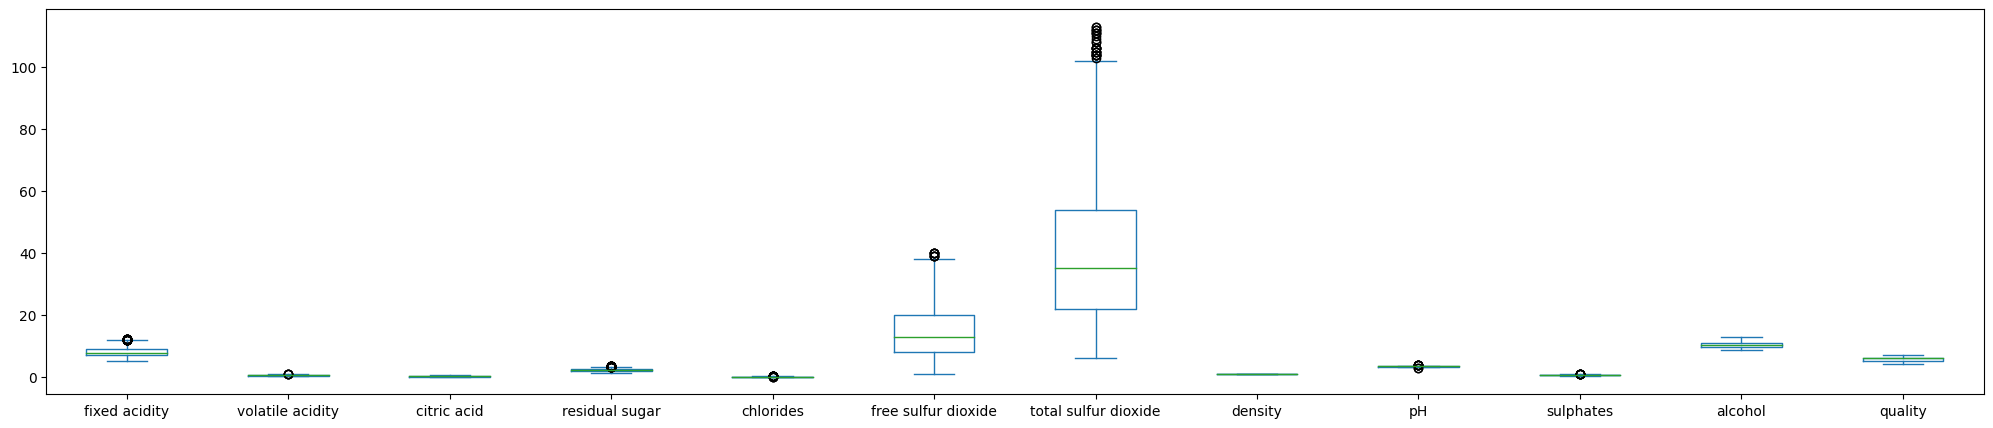

In [39]:
data.plot(kind="box", figsize=(25,5))

Using the IQR method for removing outliers, the most extreme outliers in each column were removed.

Challenges encountered while performing data exploration included keeping track of all the methods and parameters needed for plotting and dropping columns.